# **Bank Customer Churn Model**

**OBJECTIVE**: Identifying customer churn in banks will helps the management to classification who are likely to churn early and target customers using promotions, as well as provide insight into which factors should be considered when retaining customers.

 **Data Source:**Data is taken from my own  repository from github.com

**First Of All We Import All Required Library**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

**Import Data**

In [40]:
 df=pd.read_csv("https://raw.githubusercontent.com/devesh950/Bank-Customer-Churn-Predictions-Using-Machine-Learning/refs/heads/main/Bank%20Customer%20Datasets")

**Describe Data**

In [41]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [44]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [45]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Data Visualization**

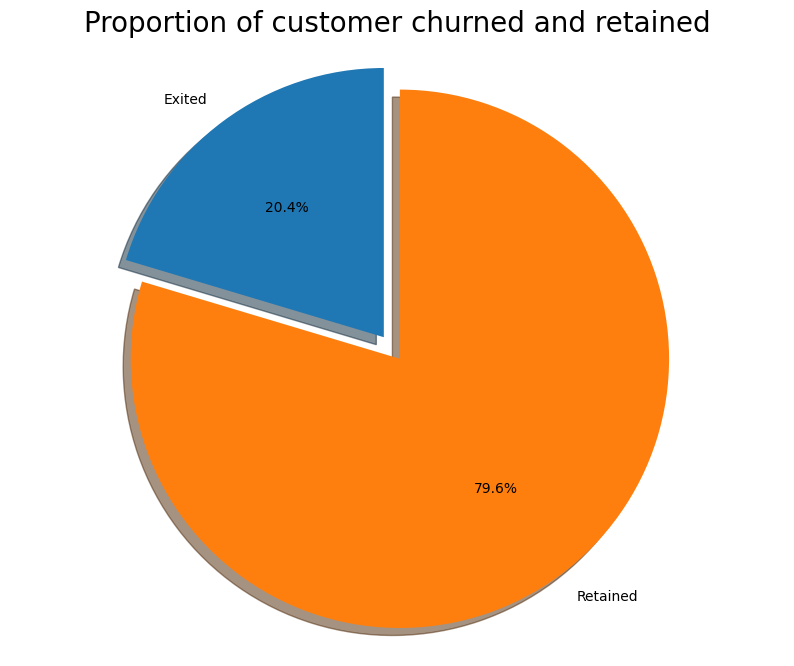

In [46]:
labels = 'Exited', 'Retained'
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


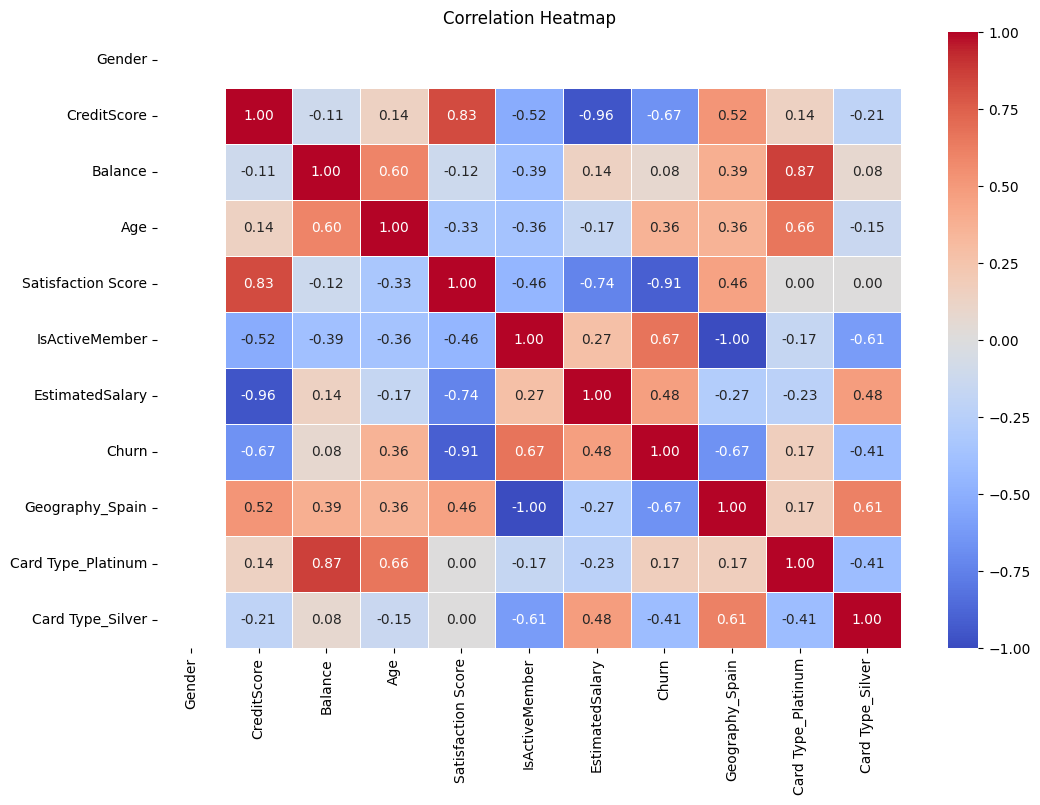

In [47]:
# Required imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Your original data
data = {
    'Surname': ['Hargrave', 'Hill', 'Onio', 'Boni', 'Mitchell'],
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Female'],
    'Geography': ['France', 'Spain', 'France', 'France', 'Spain'],
    'CreditScore': [619, 608, 502, 699, 850],
    'Balance': [0, 83807.86, 159660.8, 0, 125510.82],
    'Age': [42, 41, 42, 39, 43],
    'Card Type': ['Gold', 'Silver', 'Platinum', 'Gold', 'Platinum'],
    'Satisfaction Score': [3, 4, 3, 5, 5]
}

# Adding new columns
data['IsActiveMember'] = [1, 0, 1, 1, 0]  # Binary column indicating active members
data['EstimatedSalary'] = [101348.88, 112542.58, 113931.57, 93826.63, 79084.1]  # Estimated salaries
data['Churn'] = [1, 0, 1, 0, 0]  # Binary column indicating churn (1: Churned, 0: Retained)

# Create DataFrame
df = pd.DataFrame(data)

# Label Encoding for Gender (Female: 0, Male: 1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encoding for Geography and Card Type (dropping first column to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=['Geography', 'Card Type'], drop_first=True)

# Drop non-numeric column 'Surname' (because it's not numeric and isn't needed for correlation)
df_numeric = df_encoded.drop(columns=['Surname'])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [48]:
df=df[['CreditScore','Geography','Gender','Age','Balance','IsActiveMember','EstimatedSalary','Churn']]
#sns.pairplot(data=df,hue='Churn')
df

,CreditScore,Geography,Gender,Age,Balance,IsActiveMember,EstimatedSalary,Churn
0,619,France,0,42,0.00,1,101348.88,1
1,608,Spain,0,41,83807.86,0,112542.58,0
2,502,France,0,42,159660.80,1,113931.57,1
3,699,France,0,39,0.00,1,93826.63,0
4,850,Spain,0,43,125510.82,0,79084.10,0


<Axes: xlabel='Balance', ylabel='Count'>

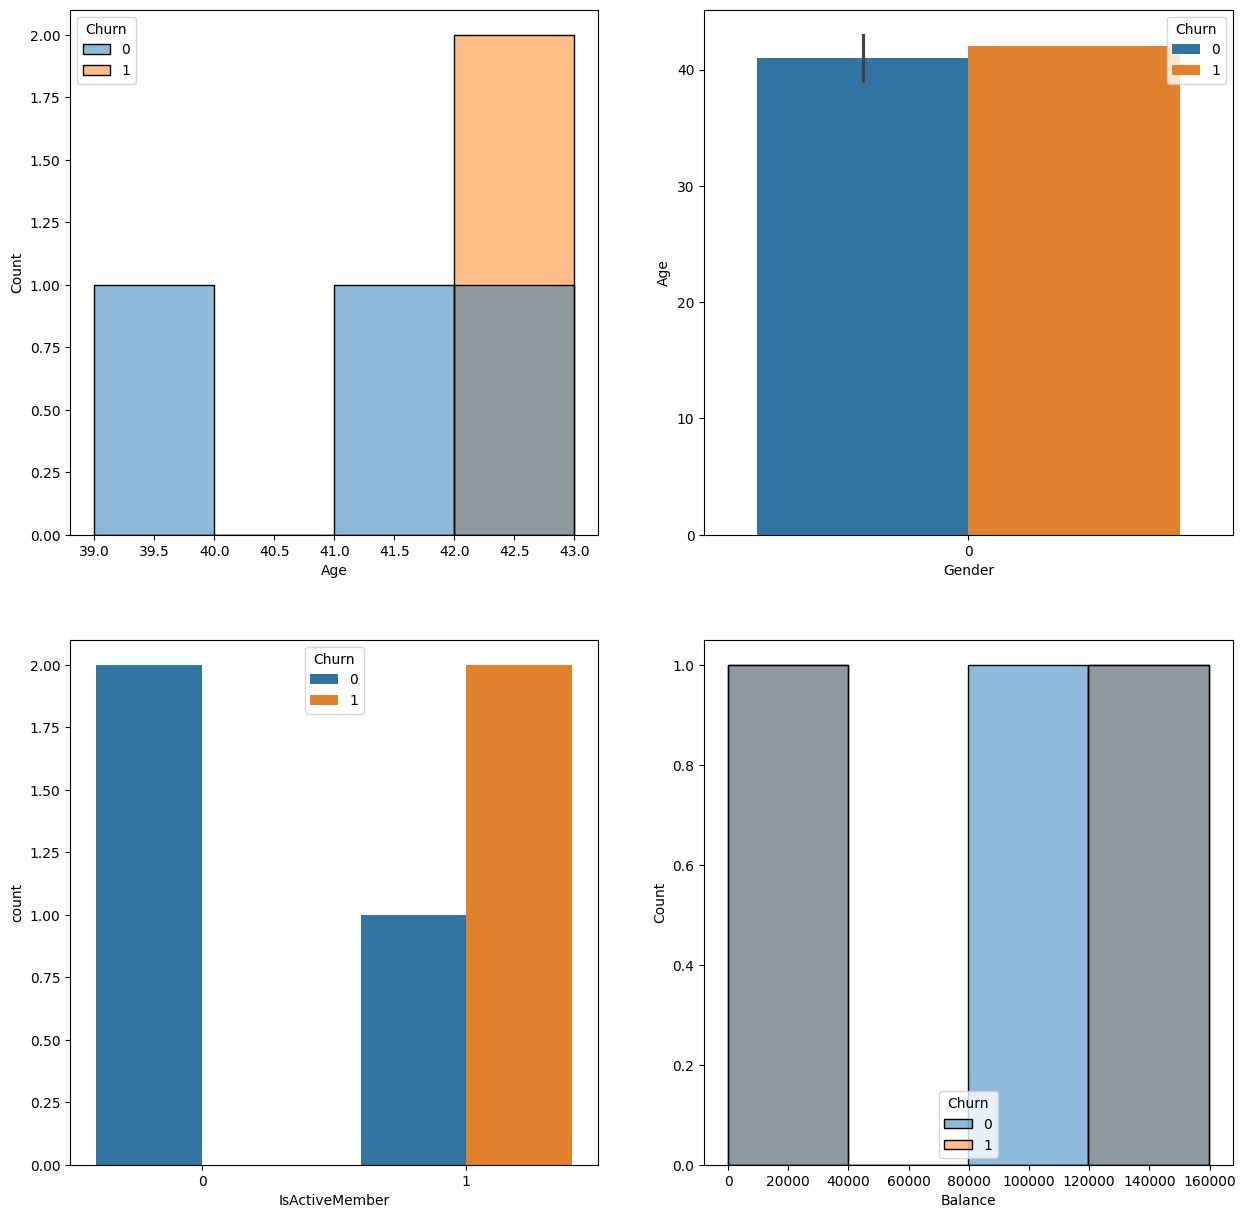

In [49]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.histplot(ax=ax[0,0],data=df,x='Age',hue='Churn')
sns.barplot(ax=ax[0,1],data=df,x='Gender',y='Age',hue='Churn')
sns.countplot(ax=ax[1,0],data=df,x='IsActiveMember',hue='Churn')
sns.histplot(ax=ax[1,1],data=df,x='Balance',hue='Churn')

**Define Target variable (y) and Feature Variables (X)**

In [50]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

[[619 'France' 0 42 0.0 1 101348.88]
 [608 'Spain' 0 41 83807.86 0 112542.58]
 [502 'France' 0 42 159660.8 1 113931.57]
 [699 'France' 0 39 0.0 1 93826.63]
 [850 'Spain' 0 43 125510.82 0 79084.1]]
[1 0 1 0 0]


**Data Standardization**

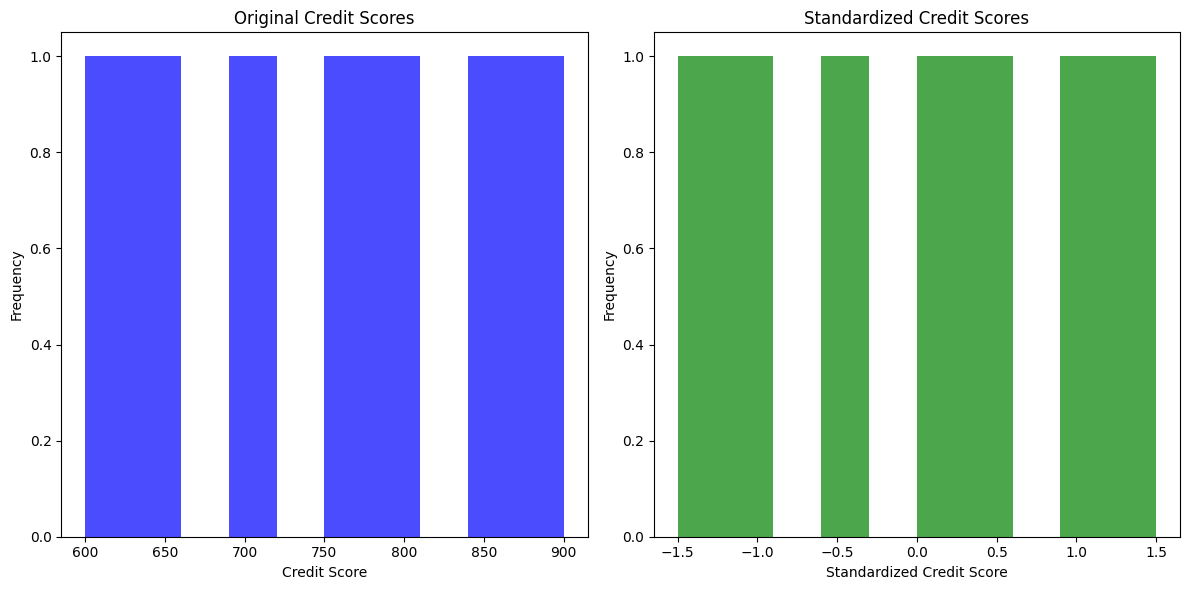

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Example DataFrame
data = {'CreditScore': [600, 650, 700, 750, 800, 850, 900]}
df = pd.DataFrame(data)

# Scaling CreditScore
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['CreditScore']])  # Ensure input is 2D

original_values = df['CreditScore'].values
scaled_values = X_scaled[:, 0]  # Assuming CreditScore is the first (and only) feature

# Visualization
plt.figure(figsize=(12, 6))

# Original Values
plt.subplot(1, 2, 1)
plt.title('Original Credit Scores')
plt.hist(original_values, bins=10, color='blue', alpha=0.7)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

# Scaled Values
plt.subplot(1, 2, 2)
plt.title('Standardized Credit Scores')
plt.hist(scaled_values, bins=10, color='green', alpha=0.7)
plt.xlabel('Standardized Credit Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Train Test Split**

In [52]:
 from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Modeling

In [53]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create a sample dataset
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, random_state=42)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Check the training accuracy
accuracy = classifier.score(X_train, y_train)
print(f"Training Accuracy: {accuracy:.2f}")


Training Accuracy: 1.00


**Model Prediction**

In [54]:
X_test = X_test.reshape(1, -1)


**Model Evaluation**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics

# Create a sample dataset
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9


In [56]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



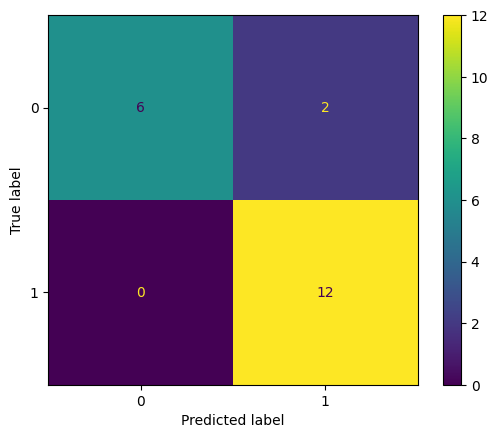

In [57]:
from sklearn import metrics

# Assuming y_test and y_pred are already defined
cm = metrics.confusion_matrix(y_test, y_pred)

# Get the unique classes from the test set
display_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot confusion matrix
metrics.ConfusionMatrixDisplay(cm, display_labels=display_labels).plot()


**Explanation**

Hence, we can conclude that we have developed the bank customer churning model using RandomForestClassifier and state that based on the features with high correlation, we are able to predict whether a consumer will churn or not thus saving time of bank in that prediction